# ¿Qué pensamos sobre la navidad en tiempos de Covid? 
## Yessica Lorena González Cajicá

### Cuando se habla de navidad se piensa en regalos, estar en familia, incluso viajar o estar de fiesta. Teniendo en cuenta que este 2020 se ha caracterizado con la llegada del Covid 19 al mundo y ha cambiado nuestro modo de vida marcando un antes y  un después. En medio del significado y las tradiciones acerca de la navidad, se busca clasificar la percepción de los twiteros de la ciudad de Bogotá mediante el análisis de sentimientos (positivos, negativos y neutros)"

## Cargue Tweets

In [1]:
import pandas as pd
navidad = pd.read_csv('navidad.csv')
navidad.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,0,El primer bocado de pan de jamón del año es la...,2020-11-27 03:54:16,Bogotá,Bogotá,1332170853363150853,https://twitter.com/i/web/status/1332170853363...,El primer bocado de pan de jamón del año es la...,[],[],[]
1,1,Estas vísperas de navidad nos tienen arriunado...,2020-11-27 03:54:07,Bogotá,"Manizales, Colombia",1332170813500510208,https://twitter.com/i/web/status/1332170813500...,Estas vísperas de navidad nos tienen arriunados,[],[],['@lorenzoCuartas']
2,2,@MiguePurple Mi regalo de navidad,2020-11-27 03:50:18,Bogotá,"Bogotá, D.C., Colombia",1332169854967746560,https://twitter.com/i/web/status/1332169854967...,Mi regalo de navidad,[],[],['@MiguePurple']
3,3,Será que Diosito me cumple el deseo de pasar n...,2020-11-27 03:30:53,Bogotá,"Tolima, Colombia",1332164966460366853,https://twitter.com/i/web/status/1332164966460...,Será que Diosito me cumple el deseo de pasar n...,[],[],[]
4,4,"Amo la navidad, fin.",2020-11-27 03:23:36,Bogotá,Armenia.,1332163135667572736,https://twitter.com/i/web/status/1332163135667...,"Amo la navidad, fin.",[],[],[]


## Traducción Twitts y Cargue Librerías

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
translator = Translator()

In [3]:
navidad['trad'] = navidad['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))

In [4]:
navidad['ingles'] = navidad['trad'].apply(lambda valor: valor.text)

## Valoración de Sentimientos

In [5]:
vader = SentimentIntensityAnalyzer()
navidad['sentimiento'] = navidad['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

In [6]:
navidad_sentimiento = navidad[['clean', 'sentimiento']].sort_values('sentimiento')
navidad.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,trad,ingles,sentimiento
0,0,El primer bocado de pan de jamón del año es la...,2020-11-27 03:54:16,Bogotá,Bogotá,1332170853363150853,https://twitter.com/i/web/status/1332170853363...,El primer bocado de pan de jamón del año es la...,[],[],[],"Translated(src=en, dest=en, text=El primer boc...",El primer bocado de pan de jamón del año es la...,0.0
1,1,Estas vísperas de navidad nos tienen arriunado...,2020-11-27 03:54:07,Bogotá,"Manizales, Colombia",1332170813500510208,https://twitter.com/i/web/status/1332170813500...,Estas vísperas de navidad nos tienen arriunados,[],[],['@lorenzoCuartas'],"Translated(src=en, dest=en, text=Estas víspera...",Estas vísperas de navidad nos tienen arriunados,0.0
2,2,@MiguePurple Mi regalo de navidad,2020-11-27 03:50:18,Bogotá,"Bogotá, D.C., Colombia",1332169854967746560,https://twitter.com/i/web/status/1332169854967...,Mi regalo de navidad,[],[],['@MiguePurple'],"Translated(src=en, dest=en, text= Mi regalo de...",Mi regalo de navidad,0.0
3,3,Será que Diosito me cumple el deseo de pasar n...,2020-11-27 03:30:53,Bogotá,"Tolima, Colombia",1332164966460366853,https://twitter.com/i/web/status/1332164966460...,Será que Diosito me cumple el deseo de pasar n...,[],[],[],"Translated(src=en, dest=en, text=Será que Dios...",Será que Diosito me cumple el deseo de pasar n...,0.0
4,4,"Amo la navidad, fin.",2020-11-27 03:23:36,Bogotá,Armenia.,1332163135667572736,https://twitter.com/i/web/status/1332163135667...,"Amo la navidad, fin.",[],[],[],"Translated(src=en, dest=en, text=Amo la navida...","Amo la navidad, fin.",0.0


## Clasificación de Sentimientos

In [7]:
navidad_sentimiento['resultado'] = " "
navidad_sentimiento.loc[navidad['sentimiento']>0, 'resultado'] = 'Positivo'
navidad_sentimiento.loc[navidad['sentimiento']<0, 'resultado'] = 'Negativo'
navidad_sentimiento.loc[navidad['sentimiento']==0, 'resultado'] = 'Neutro'
navidad_sentimiento

,clean,sentimiento,resultado
106,A mi ya me dicen que el niño dios de navidad ...,-0.9081,Negativo
155,"jueputa, dejen de poner Navidad sin ti, ya no ...",-0.8360,Negativo
45,Creo que de navidad me voy a regalar otro tatu...,-0.8225,Negativo
144,La Cuarentena agarró Semana Santa Vacaciones ...,-0.8070,Negativo
471,La de navidad águila roja ajajja no se cómo se...,-0.7579,Negativo
...,...,...,...
372,🤣🤣🤣🤣🤣 Llegó Navidad,0.9432,Positivo
90,Llegó la Navidad a mi bella casa🥳🥳🥳🥳🥳🥳🥳,0.9451,Positivo
218,"Llegó Navidad !! Gracias 🥰🥰🥰 en Bogotá, Colom...",0.9735,Positivo
273,Todo el mundo poniendo hoy las luces de navida...,0.9837,Positivo


In [8]:
navidad_sentimiento2 = pd.DataFrame(navidad_sentimiento.resultado.value_counts()).reset_index()
navidad_sentimiento2.columns = ['sentimiento', 'resultado']
navidad_sentimiento2

,sentimiento,resultado
0,Neutro,311
1,Positivo,101
2,Negativo,88


## Visualización Sentimientos

In [9]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt


%matplotlib inline
init_notebook_mode(connected=True)

trace = go.Bar(x=navidad_sentimiento2.sentimiento.values,
               y=navidad_sentimiento2.resultado.values)

layout = go.Layout(title='Conteo de Tweets sobre la Navidad según sentimientos ')

fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

## Visualización Emojis Detectados

In [10]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list 

navidad['emojis'] = navidad['clean'].apply(lambda text: get_emojis(text))

from collections import Counter

navidad_emojis = pd.DataFrame(list(zip(Counter(sum(navidad.emojis.values,[])).keys(),Counter(sum(navidad.emojis.values,[])).values())))
navidad_emojis.columns = ['emoji', 'cnt']
navidad_emojis.sort_values('cnt', ascending=False, inplace=True)
navidad_emojis.head()

,emoji,cnt
6,🎄,56
27,🥰,18
5,😍,18
14,🎅,17
49,🤣,13


In [12]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)


trace = go.Bar(x=navidad_emojis.emoji.values[:20],
               y=navidad_emojis.cnt.values[:20])

layout = go.Layout(title= 'Emojis usados sobre la Navidad')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Visualización de Palabras según Sentimientos

In [13]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import display
import PIL.Image
from IPython.display import display

### Procesamiento de Palabras

In [14]:
import re
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish') 

def pre_procesado(texto):
    texto = texto.lower() #Definición de minúsculas
    texto = re.sub(r"[\W\d_]+", " ", texto) #Conservar solo palabras
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp]) #Eliminar palabras vacías
    return texto

In [15]:
navidad_sentimiento['palabras'] = navidad_sentimiento['clean'].apply(lambda texto: pre_procesado(texto))
navidad_sentimiento.head()

,clean,sentimiento,resultado,palabras
106,A mi ya me dicen que el niño dios de navidad ...,-0.9081,Negativo,dicen niño dios navidad va perdonar deudas
155,"jueputa, dejen de poner Navidad sin ti, ya no ...",-0.8360,Negativo,jueputa dejen poner navidad chévere c
45,Creo que de navidad me voy a regalar otro tatu...,-0.8225,Negativo,creo navidad voy regalar tatuaje así febrero e...
144,La Cuarentena agarró Semana Santa Vacaciones ...,-0.8070,Negativo,cuarentena agarró semana santa vacaciones hall...
471,La de navidad águila roja ajajja no se cómo se...,-0.7579,Negativo,navidad águila roja ajajja cómo llama dice laa...


In [27]:
positivos = navidad_sentimiento.loc[navidad_sentimiento.resultado == 'Positivo', ['resultado', 'palabras']]
negativos = navidad_sentimiento.loc[navidad_sentimiento.resultado == 'Negativo', ['resultado', 'palabras']]
neutro = navidad_sentimiento.loc[navidad_sentimiento.resultado == 'Neutro', ['resultado', 'palabras']]

### Palabras más usadas en Tweets Clasificados como Negativos

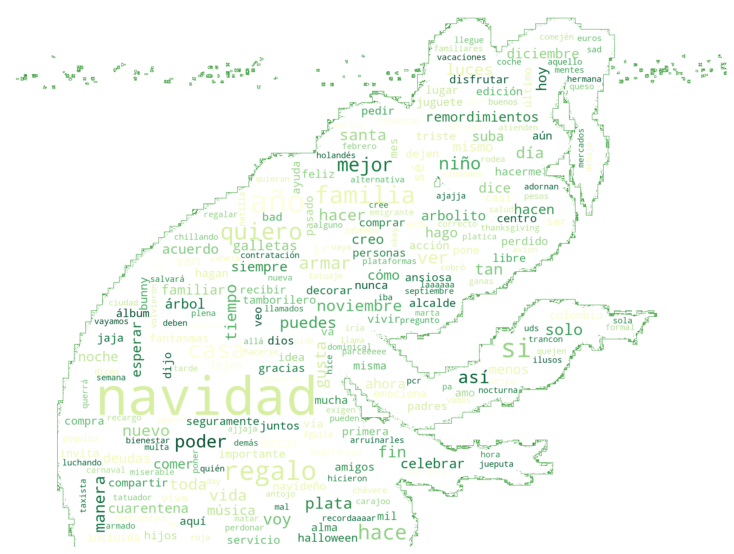

In [34]:
palabras = negativos.palabras.str.cat(sep=' ')
grinch = PIL.Image.open("C:/Users/jlo46/OneDrive/Documentos/ESPECIALIZACION/SEMESTRE 2/Fundamentos NLP/grinch.jpg")
mask = np.array(grinch)
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='YlGn',
                     mask=mask, contour_width=0.5, contour_color='green').generate(palabras)
wordcloud.to_file("grinch.jpg")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Palabras más usadas en Tweets Clasificados como Positivos

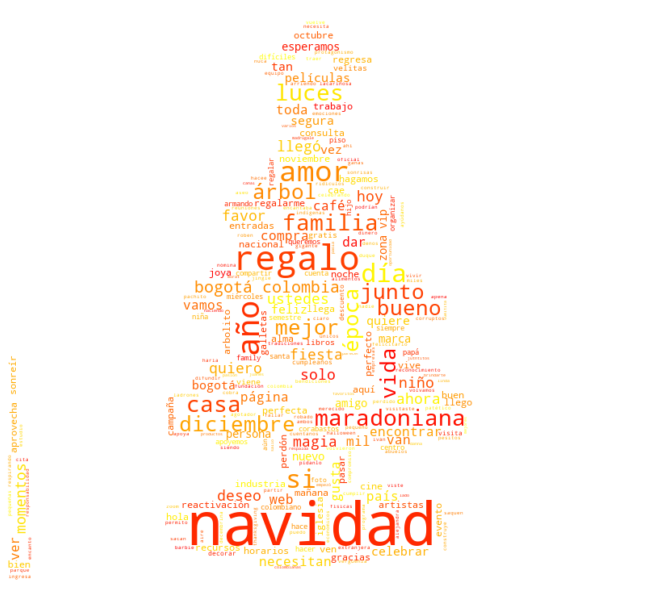

In [32]:
palabras = positivos.palabras.str.cat(sep=' ')
arbol = PIL.Image.open("C:/Users/jlo46/OneDrive/Documentos/ESPECIALIZACION/SEMESTRE 2/Fundamentos NLP/arbol.jpg")
mask = np.array(arbol)
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='autumn',
                     mask=mask, contour_width=0.5, contour_color='white').generate(palabras)
wordcloud.to_file("arbol.jpg")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Palabras más usadas en Tweets Clasificados como Neutros

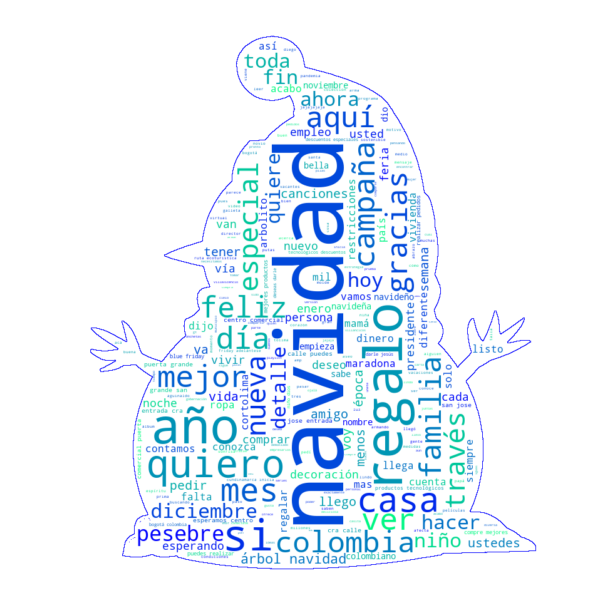

In [33]:
palabras = neutro.palabras.str.cat(sep=' ')
snowman = PIL.Image.open("C:/Users/jlo46/OneDrive/Documentos/ESPECIALIZACION/SEMESTRE 2/Fundamentos NLP/snowman.png")
mask = np.array(snowman)

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='winter',
                     mask=mask, contour_width=0.5, contour_color='blue').generate(palabras)
wordcloud.to_file("snowman.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Posibles Limitaciones e Inconvemientes

### Obtener un mayor volumen de datos para haber ejecutado un modelo de clasificación de Machine Learning, dado que con 500 observaciones puede ser no suficiente. El equipo no fue el mejor aliado en términos de rendimiento.
### Debido a la traducción aplicada al inglés, los resultados no fueron acordes a la expectativa.

## Conclusiones

### A partir de una representación de 500 tweets publicados desde la ciudad de Bogotá, se identifca que la percepción sobre la navidad es de carácter neutro, dado que 311 (62.2%) de los tweets fueron clasificados en dicha categoría. 
### El emoji más utilizado para expresar la navidad, es el árbol de navidad con 56 repeticiones. 
### Si bien estamos a vísperas de la llegada del mes Diciembre, la percepcion sobre la navidad puede cambiar conforme nos acercamos a la fecha.